# 用python动手实践学习大数定律与中心极限定理

## 1. The Law of Large Numbers（大数定律）
对于理论，维基百科有这样的介绍：大数定律又称大数法则、大数律，是描述相当多次数重复实验的结果的定律。根据这个定律知道，样本数量越多，则其算术平均值就有越高的概率接近期望值。在此我们利用python直观演示：

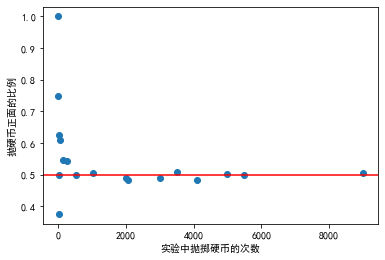

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus']=False

# 每次实验翻转硬币次数
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2000,2048, 3000,3500,4096,5000,5500,9000]) 
# 使用二项式函数来模拟一枚均匀的硬币,计算每次实验出现为正面的次数
heads_count = [np.random.binomial(n, 0.5) for n in ns]
# 计算硬币翻转为正面的占比
proportion_heads = heads_count/ns

fig, ax = plt.subplots()
plt.xlabel('实验中抛掷硬币的次数')
plt.ylabel('抛硬币正面的比例')
plt.axhline(0.5, color='r')
_ = ax.scatter(ns, proportion_heads)

从上图不难发现，当掷硬币的次数越多，翻转得到为正面的数量，越接近掷的总次数的一半，也就是越接近一枚均匀硬币的期望值0.5

## 2. The Central Limit Theorem（中心极限定理 CLT）

中心极限定理指出，从总体中，具有放回的抽取足够多的随机样本，则样本均值的分布将近似为正态分布（单方面实验测试过，如果不放回的随机抽样，样本均值分布也是近似正态分布）。只要样本量足够大（通常 n>=30）,无论总体分布的初始形状如何，抽样分布都将近似于正态分布。如果总体是正态的，那么该定理即使对于 n<30 的样本也成立。

(-1.5, 1.5)

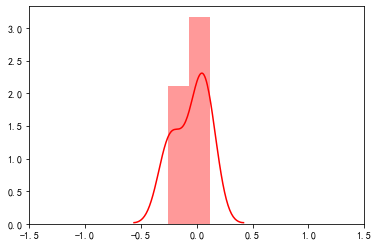

In [2]:
# 随机生成均值为0,标准差为1的标准正态分布
x = np.random.normal(size=10000)

# replace=True 代表有放回
# sample_size 指的是单个样本的大小，n_samples指的是样本数量
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means
# 随机抽取10个样本，每个样本大小为10
sns.distplot(sample_mean_calculator(x, 10, 10), color='r')
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

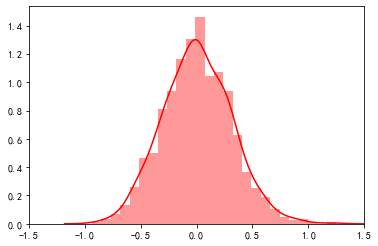

In [3]:
# 随机抽取1000个样本，每个样本大小为10
sns.distplot(sample_mean_calculator(x, 10, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

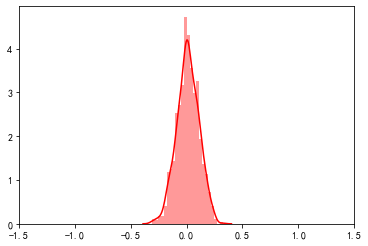

In [4]:
# 随机抽取1000个样本，每个样本大小为100
sns.distplot(sample_mean_calculator(x, 100, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

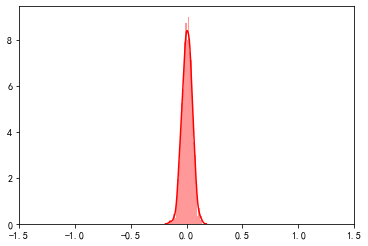

In [5]:
# 随机抽取1000个样本，每个样本大小为500
sns.distplot(sample_mean_calculator(x, 500, 1000), color='r', kde=True)
plt.xlim(-1.5, 1.5)

 在适当的条件下，大量相互独立随机变量的均值经适当标准化后依分布收敛于正态分布。每次从这些总体中随机抽取 n 个抽样，一共抽 m 次。 然后把这 m 组抽样分别求出平均值， 这些平均值的分布接近正态分布。
 
 设从均值为μ、方差为 $σ^2$（有限）的任意一个总体中抽取样本量为n的样本，当n充分大时，样本均值的抽样分布近似服从均值为μ、方差为 $σ^2/_n$ 的正态分布。

* 从上面的结果可观察到样本均值的分布是在向总体均值0靠近，接下来看下其他分布的，随机抽样的样本均值分布：

* 分布1：

<AxesSubplot:>

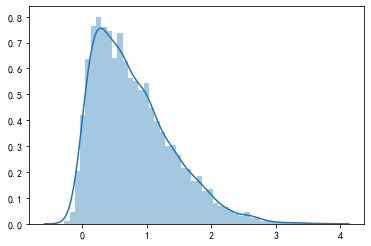

In [6]:
s = st.skewnorm.rvs(10, size=10000)
sns.distplot(s, kde=True)

<AxesSubplot:>

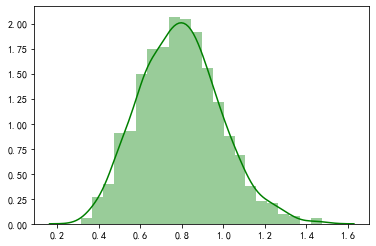

In [7]:
sns.distplot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

* 分布2：

<AxesSubplot:>

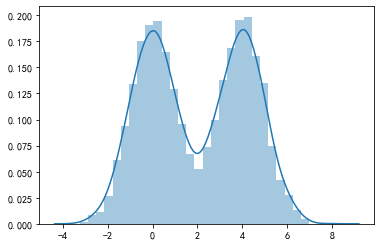

In [8]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
sns.distplot(m, kde=True)

<AxesSubplot:>

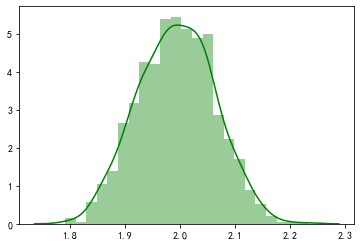

In [9]:
sns.distplot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

* 分布3：

<AxesSubplot:>

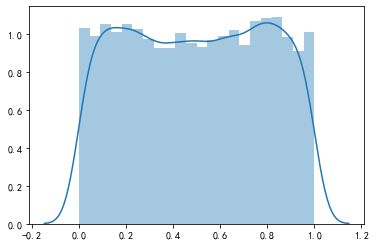

In [10]:
u = np.random.uniform(size=10000)
sns.distplot(u)

<AxesSubplot:>

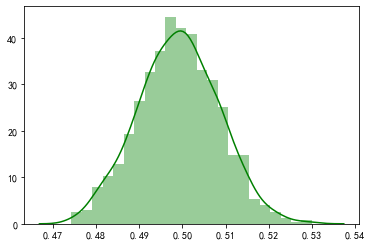

In [11]:
sns.distplot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

#### 更多例子

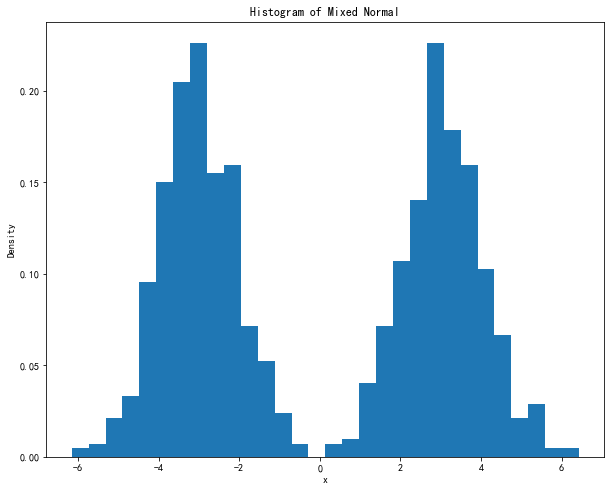

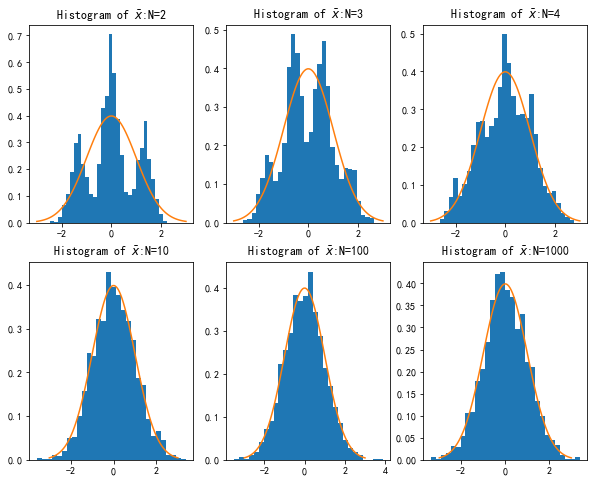

In [12]:
import numpy as np
from numpy import random as nprd

def sampling(N):
    ## 产生一组样本，以0.5的概率为z+3，0.5的概率为z-3，其中z~N(0,1)
    d=nprd.rand(N)<0.5
    z=nprd.randn(N)
    x=np.array([z[i]+3 if d[i] else z[i]-3 for i in range(N)])
    return x

N=[2,3,4,10,100,1000] # sample size
M=2000
MEANS=[]
for n in N:
    mean_x=np.zeros(M)
    for i in range(M):
        x=sampling(n)
        mean_x[i]=np.mean(x)/np.sqrt(10/n) ## 标准化，因为var(x)=10
    MEANS.append(mean_x)

## 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

x=sampling(1000)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Mixed Normal')
plt.hist(x,bins=30,density=1) ## histgram
plt.show() ## 画图

## 均值
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

## normal density
x=np.linspace(-3,3,100)
d=[1.0/np.sqrt(2*np.pi)*np.exp(-i**2/2) for i in x]

def plot_density(ax,data,N):
    ax.hist(data,bins=30,density=1) ## histgram
    ax.plot(x,d)
    ax.set_title(r'Histogram of $\bar{x}$:N=%d' % N)

plot_density(ax1,MEANS[0],N[0])
plot_density(ax2,MEANS[1],N[1])
plot_density(ax3,MEANS[2],N[2])
plot_density(ax4,MEANS[3],N[3])
plot_density(ax5,MEANS[4],N[4])
plot_density(ax6,MEANS[5],N[5])


plt.show() ## 画图

## 3. 具有二分类结果的中心极限定理

CLT也适用于二项式，但是前提是 np 和 n(1-p) 的最小值至少为 5，其中“n”指的是样本大小，“p”是“成功”的概率。比如p=0.3，n=20时，min(np, n(1-p)) = min(20*(0.3), 20*(0.7)) = min(6, 14) = 6>5

在此模拟一枚不均匀的硬币，正面的概率为0.3，如果一次实验翻转100次那么应该有期望值0.3*100=30次出现正面。接下来利用python画出实验10000次的分布：

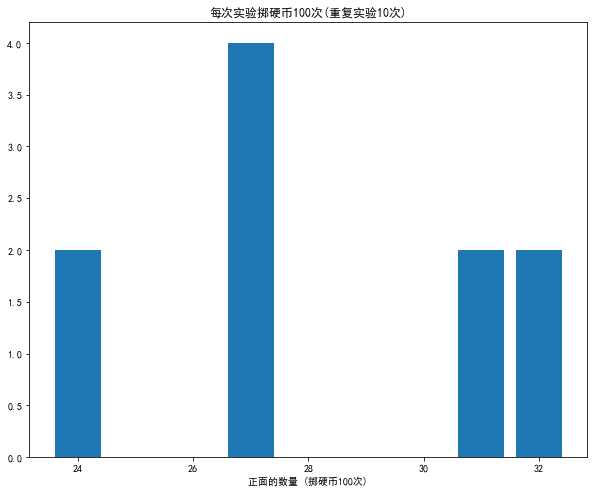

In [13]:
n_experiments = 10
heads_count = [np.random.binomial(100, 0.3) for i in range (n_experiments)]
heads, heads_count = np.unique(heads_count, return_counts=True)
event_proba = heads_count/n_experiments

plt.bar(heads, heads_count)
plt.xlabel('正面的数量 (掷硬币100次)')
plt.title("每次实验掷硬币100次(重复实验10次)")
plt.show()

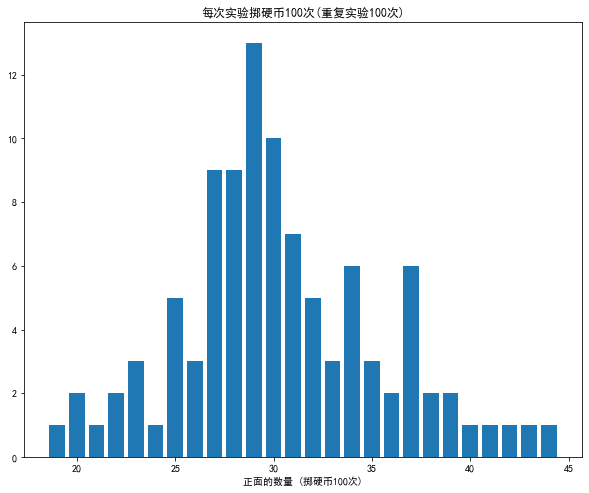

In [14]:
n_experiments = 100
heads_count = [np.random.binomial(100, 0.3) for i in range (n_experiments)]
heads, heads_count = np.unique(heads_count, return_counts=True)
event_proba = heads_count/n_experiments

plt.bar(heads, heads_count)
plt.xlabel('正面的数量 (掷硬币100次)')
plt.title("每次实验掷硬币100次(重复实验100次)")
plt.show()

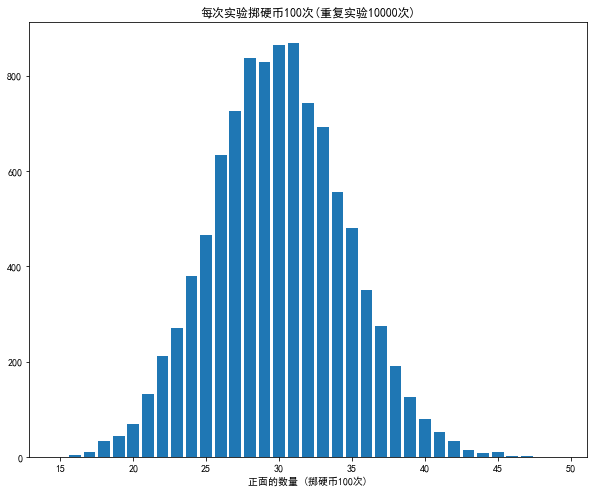

In [15]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.3) for i in range (n_experiments)]
heads, heads_count = np.unique(heads_count, return_counts=True)
event_proba = heads_count/n_experiments

plt.bar(heads, heads_count)
plt.xlabel('正面的数量 (掷硬币100次)')
plt.title("每次实验掷硬币100次(重复实验10000次)")
plt.show()

#### 从上图能清晰看出分布是集中在30的正态分布。